In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
sb.set()

In [3]:
#Following are the top 10 NASDAQ stocks which we are using 
#Apple (NASDAQ:AAPL)
#Microsoft (NASDAQ:MSFT)
#Amazon (NASDAQ:AMZN)
#Facebook (NASDAQ:FB)
#Alphabet Class C (NASDAQ:GOOG)
#Alphabet Class A (NASDAQ:GOOGL)
#Tesla (NASDAQ:TSLA)
#NVIDIA (NASDAQ:NVDA)
#PayPal Holdings (NASDAQ:PYPL)
#ASML Holdings (NASDAQ:ASML)

stocksList = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOG', 'GOOGL', 'TSLA', 'NVDA', 'PYPL', 'ASML']

In [4]:
import yfinance as yf

yf.pdr_override()
stocksData = {}
for ticker in stocksList:
    df = pdr.get_data_yahoo(ticker, start="2010-01-01", end="2022-03-30")
    df.dropna()
    #df.drop(df.columns.difference(['Date','Close']), 1, inplace=True)
    stocksData[ticker] = df

stocksData

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2009-12-31    7.611786    7.619643    7.520000    7.526071    6.444380   
 2010-01-04    7.622500    7.660714    7.585000    7.643214    6.544687   
 2010-01-05    7.664286    7.699643    7.616071    7.656429    6.556003   
 2010-01-06    7.656429    7.686786    7.526786    7.534643    6.451721   
 2010-01-07    7.562500    7.571429    7.466071    7.520714    6.439794   
 ...                ...         ...         ...         ...         ...   
 2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
 2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   
 2022-03-25  173.880005  175.279999  172.750000  174.720001  174.720001   
 2022-03-28  172.169998  175.729996  172.000000  175.600006  175.600006   
 2022-03-29  176.690002  179.009995  176.339996  178.960007  178.960007   
 
               

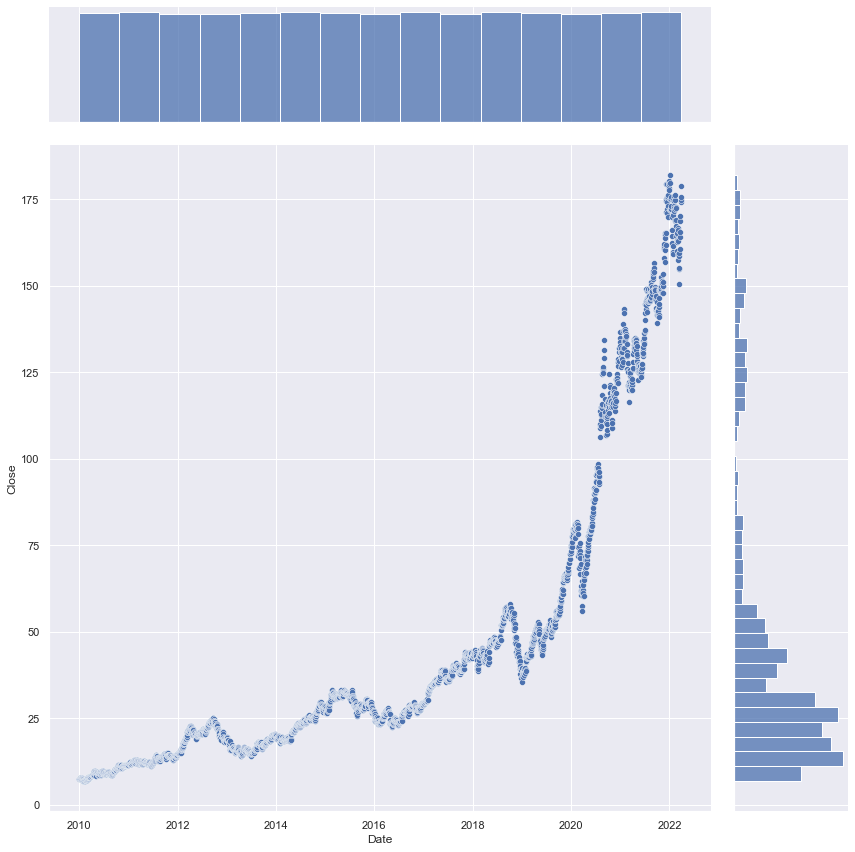

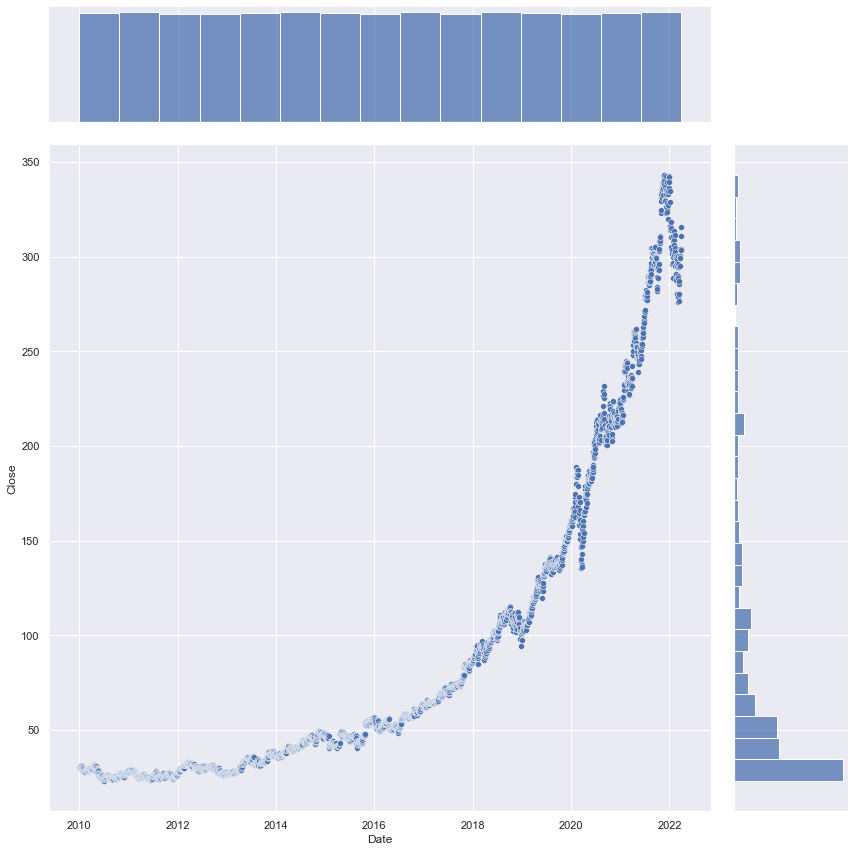

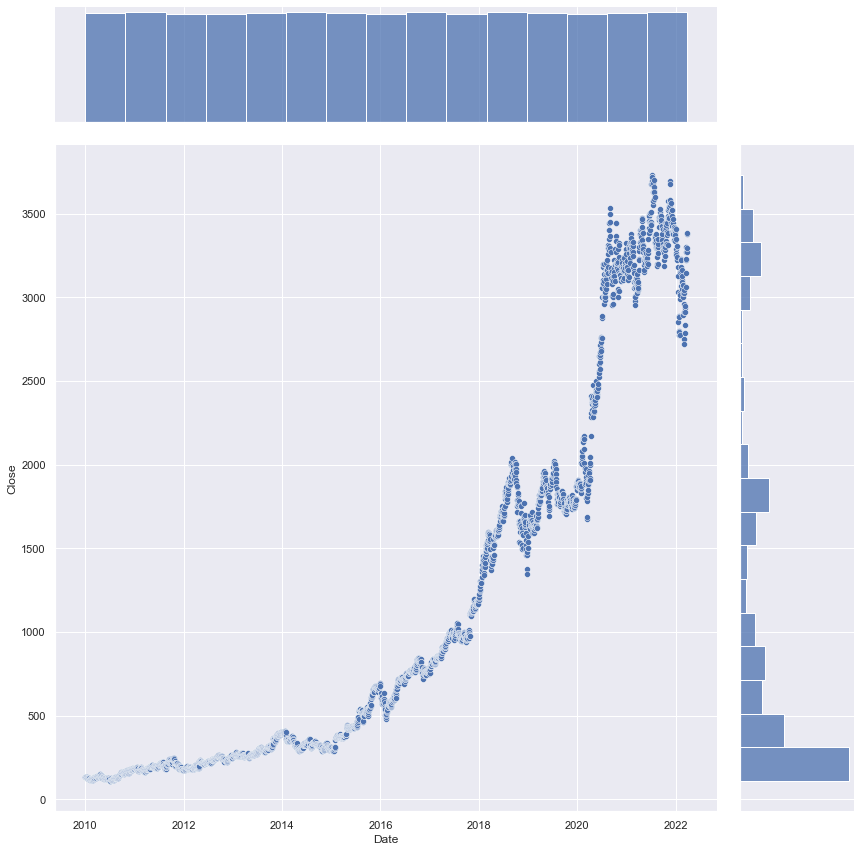

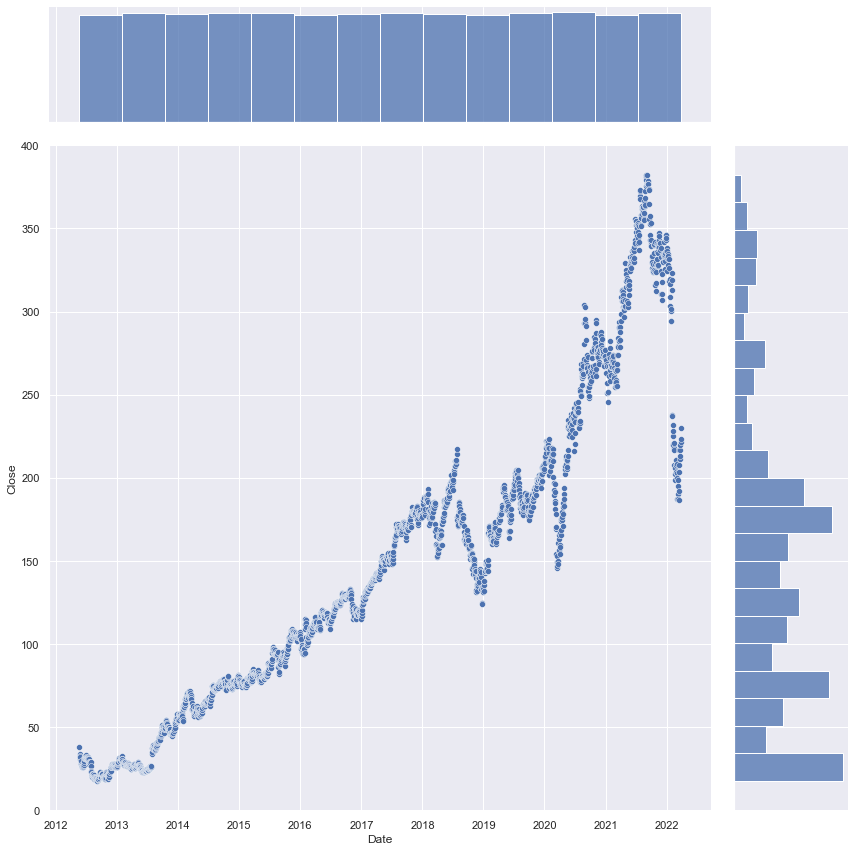

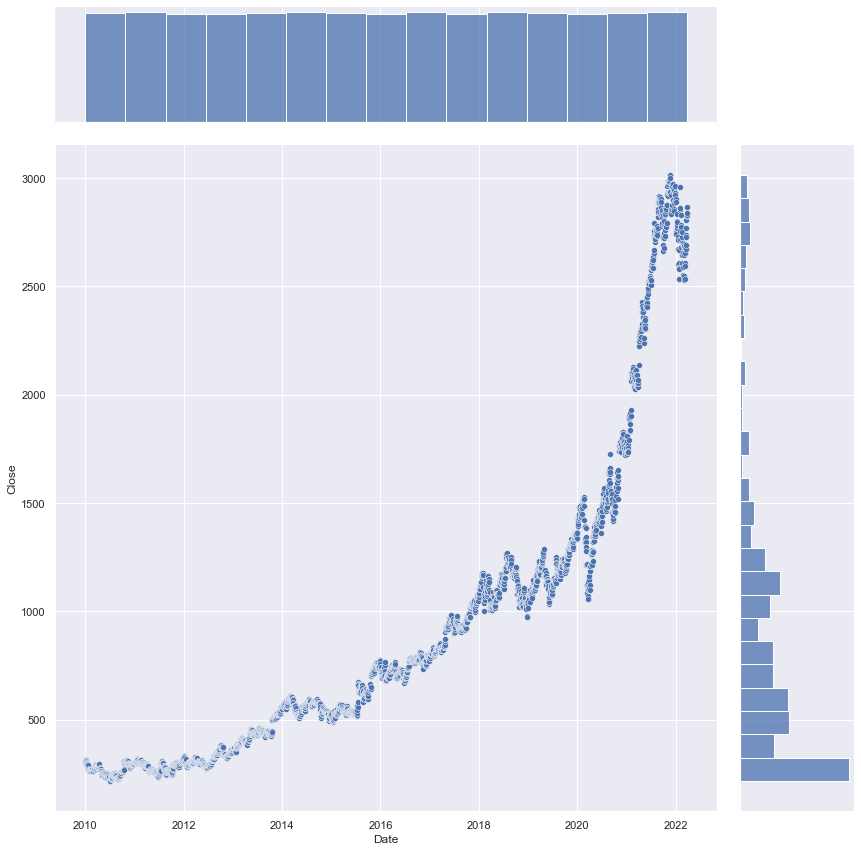

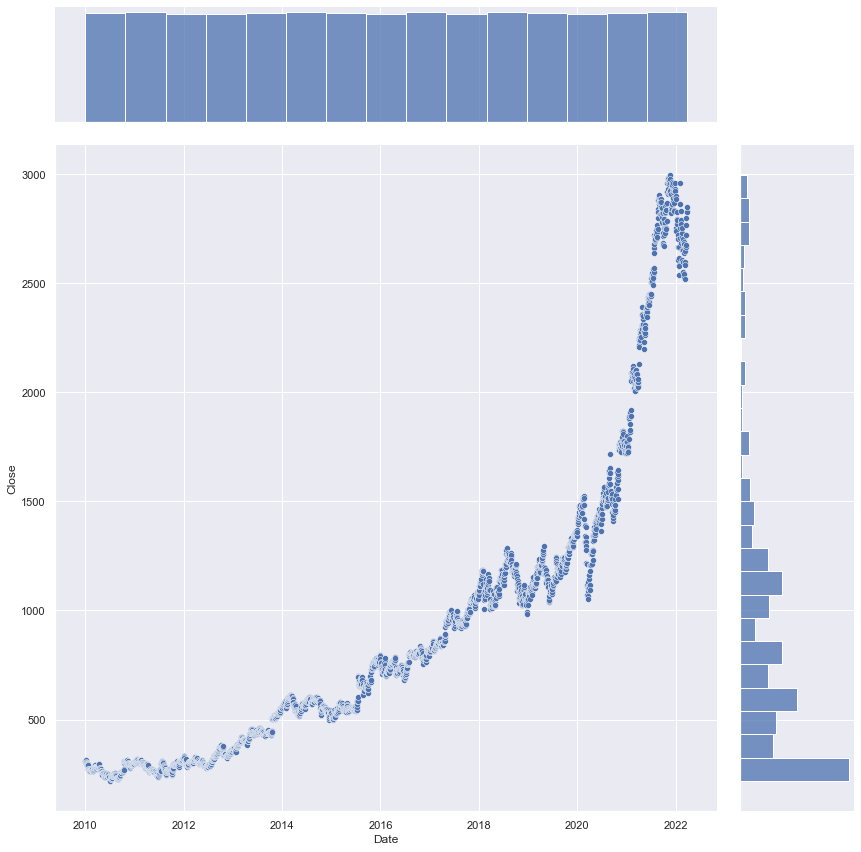

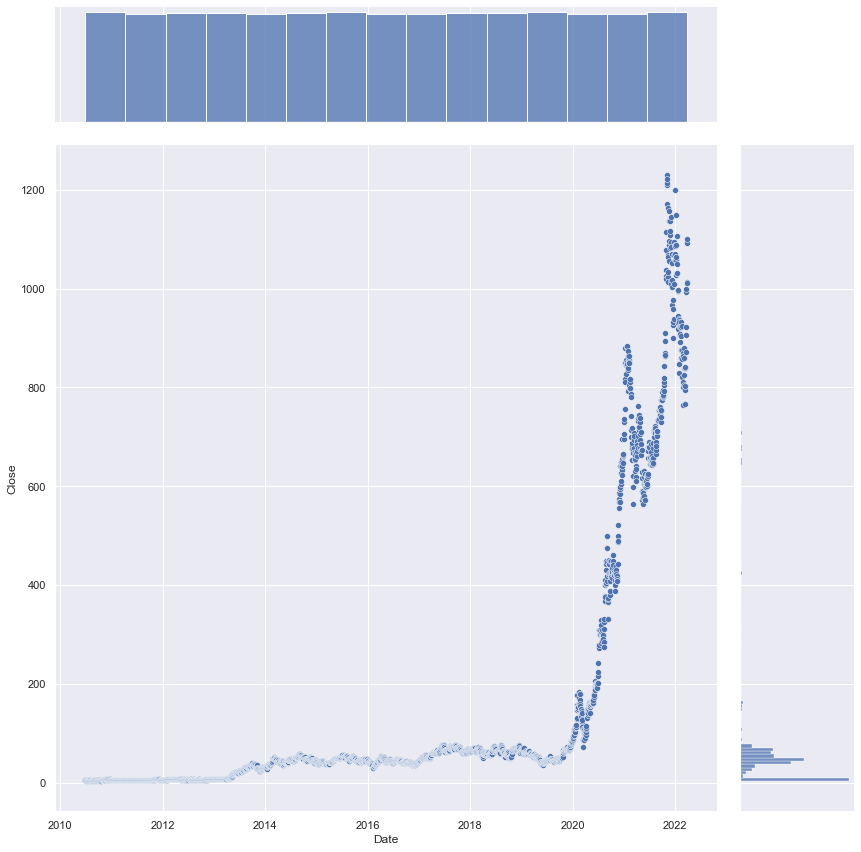

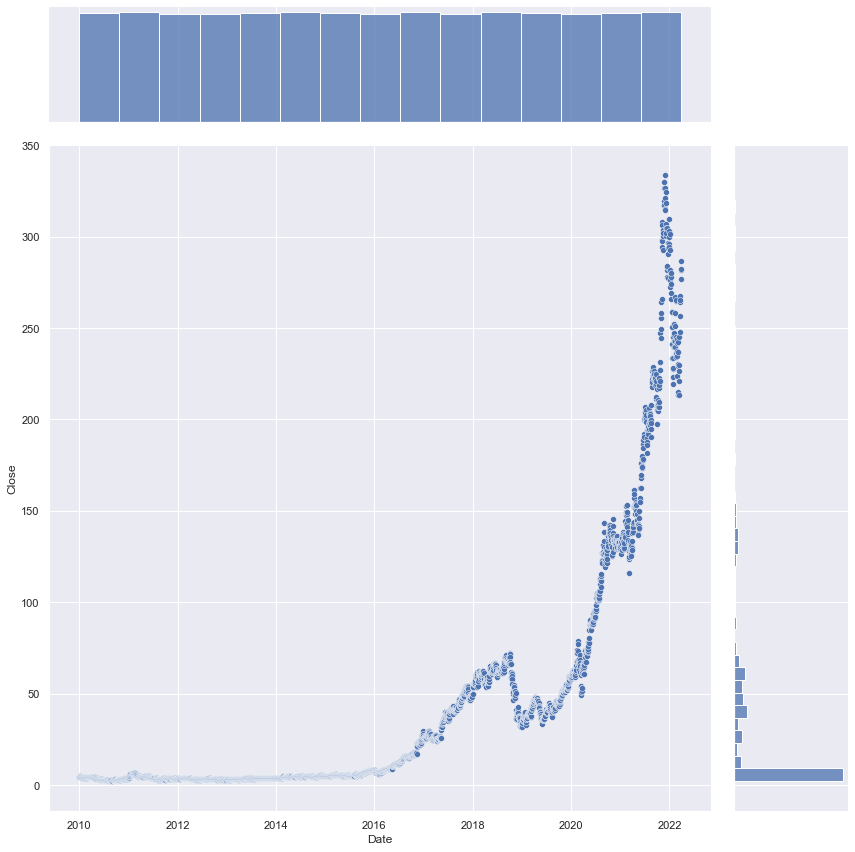

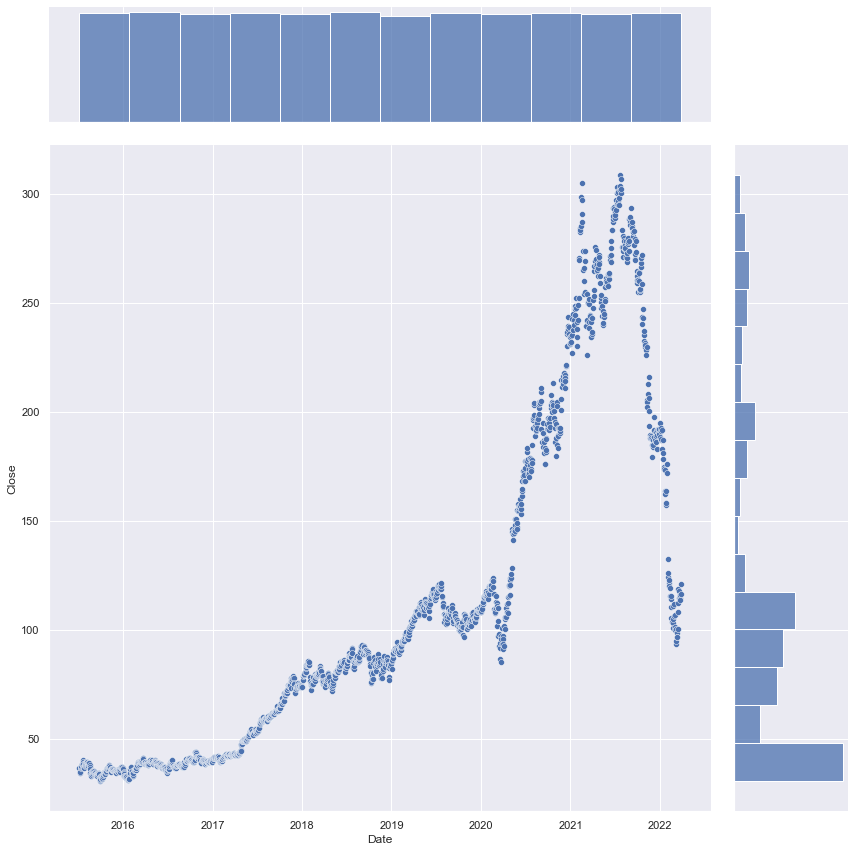

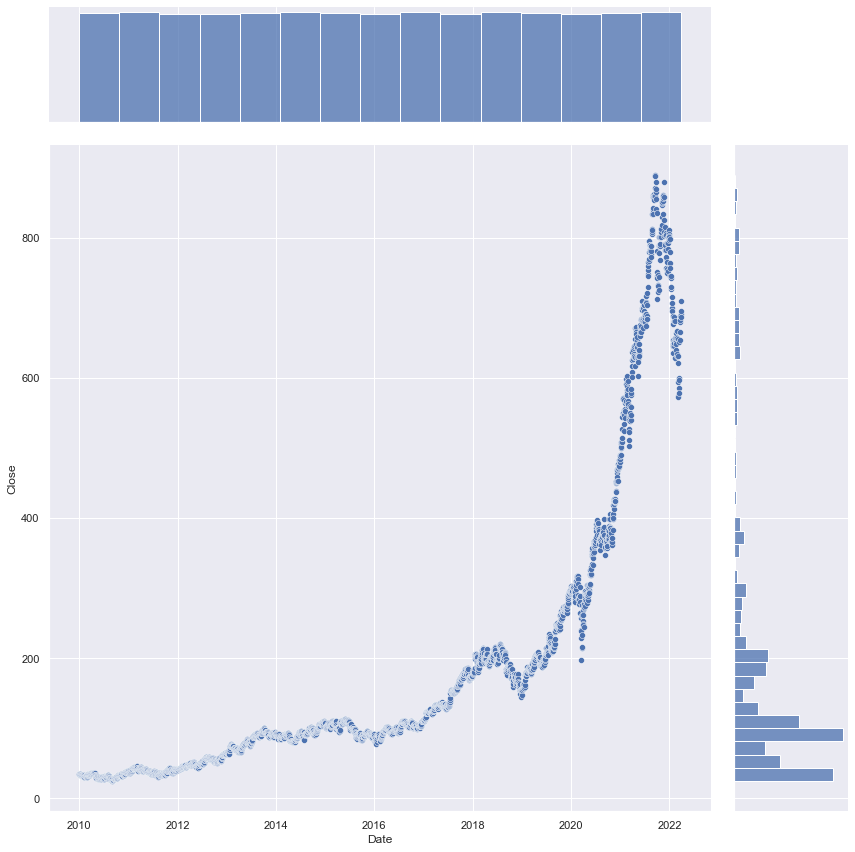

In [5]:
for ticker in stocksList:
    sb.jointplot(data = stocksData[ticker], x = "Date", y = "Close", height = 12)

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -14.977924195430042
Coefficients 	: a =  [0.03898968]


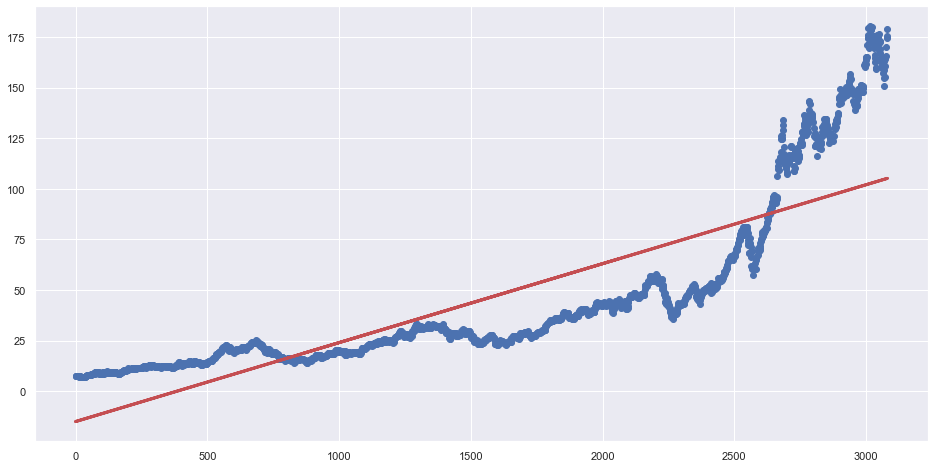

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -30.217508698525876
Coefficients 	: a =  [0.07827221]


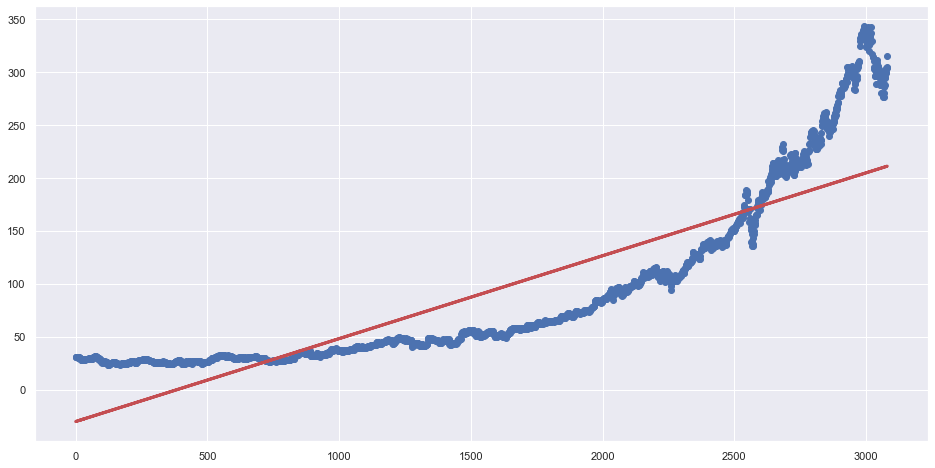

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -568.785622332108
Coefficients 	: a =  [1.08749967]


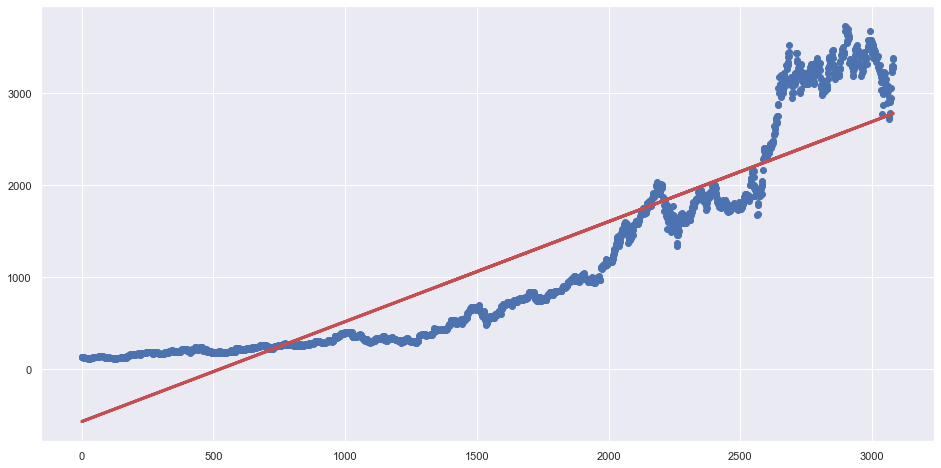

Train Set : (1985, 1) (1985,)
Test Set  : (497, 1) (497,)
Intercept 	: b =  -0.5310742836403222
Coefficients 	: a =  [0.11937733]


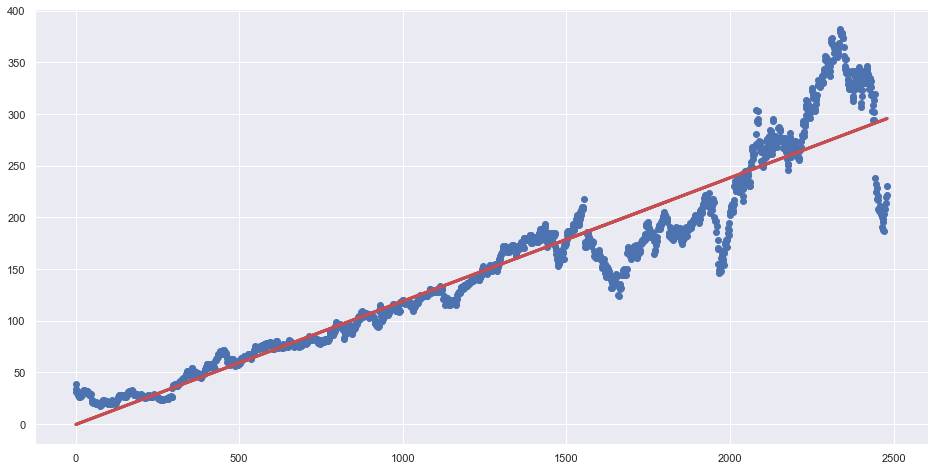

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -127.72442057886929
Coefficients 	: a =  [0.6676261]


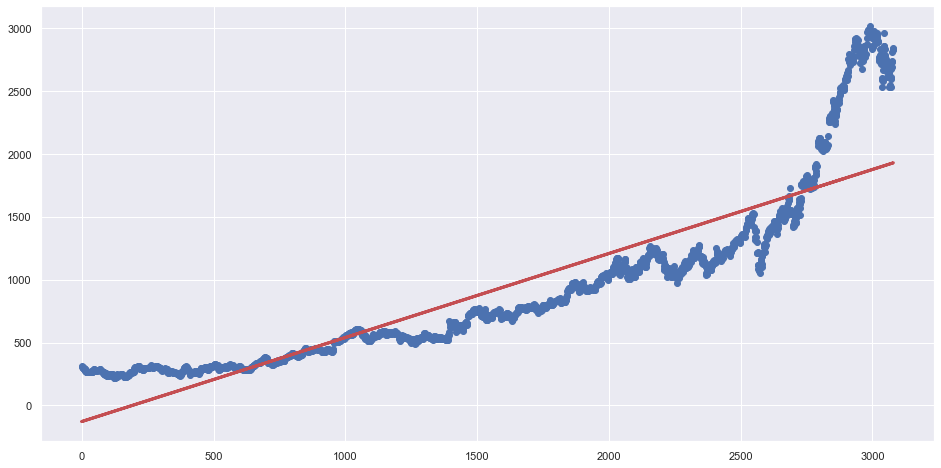

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -122.50354105963243
Coefficients 	: a =  [0.6666802]


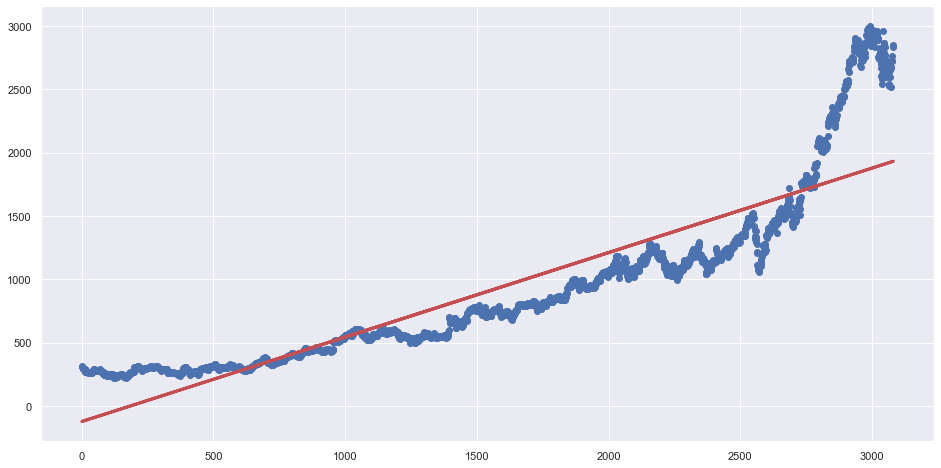

Train Set : (2367, 1) (2367,)
Test Set  : (592, 1) (592,)
Intercept 	: b =  -149.59807838182687
Coefficients 	: a =  [0.19503293]


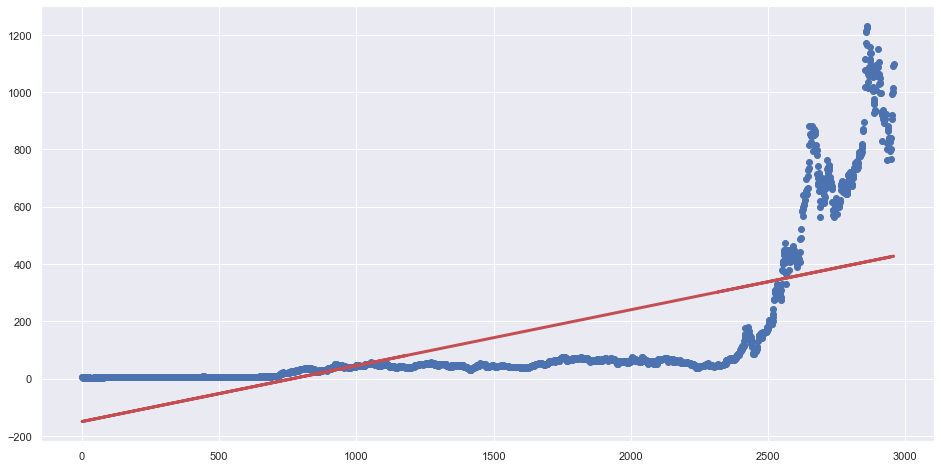

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -41.51614103161885
Coefficients 	: a =  [0.05516968]


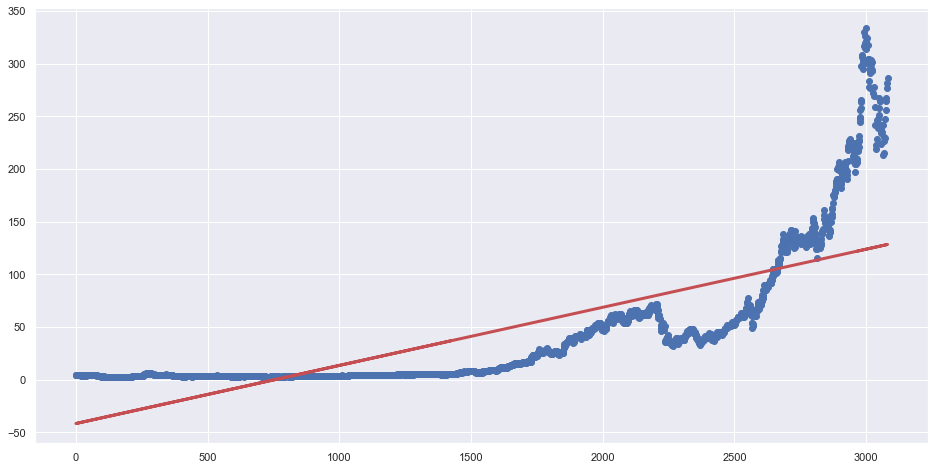

Train Set : (1357, 1) (1357,)
Test Set  : (340, 1) (340,)
Intercept 	: b =  -2.8798910224977448
Coefficients 	: a =  [0.13387972]


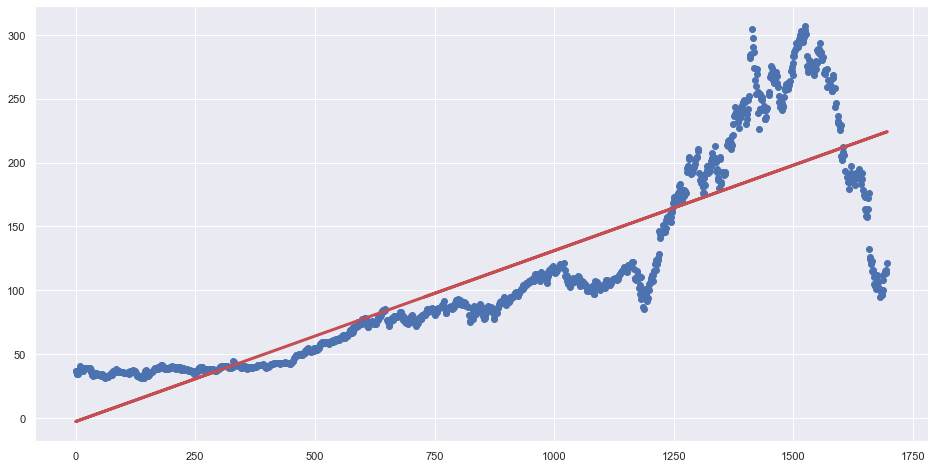

Train Set : (2465, 1) (2465,)
Test Set  : (617, 1) (617,)
Intercept 	: b =  -88.69054618973146
Coefficients 	: a =  [0.17765371]


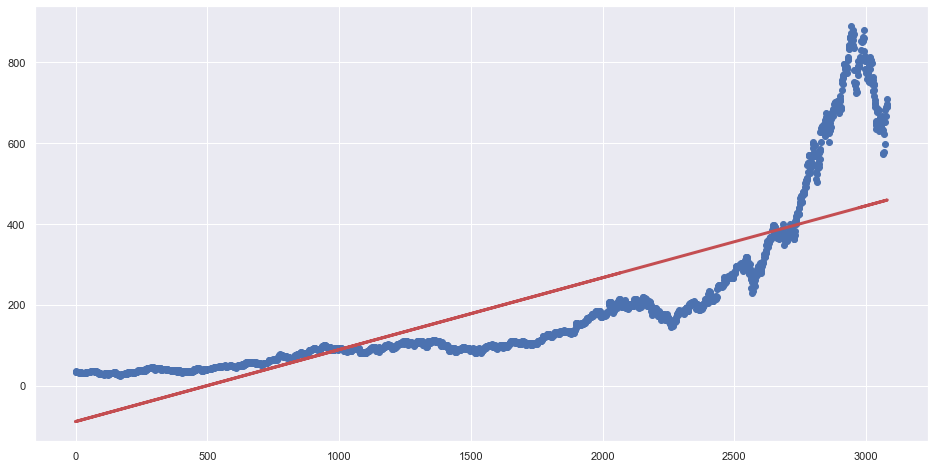

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linreg = LinearRegression()

for ticker in stocksData:
    stocksData[ticker] = stocksData[ticker].reset_index()
    X = np.array(pd.to_datetime(stocksData[ticker]['Date'].index.values, format='%Y-%m-%d'), dtype=float)
    X = X.reshape(-1, 1)
    y = np.array(stocksData[ticker]['Close'].values, dtype=float)
    
    ## HELP PLS I CANT FIGURE OUT HOW TO DO THE LINEAR REG IT SAYS KEYERROR

    # Split the Dataset into random Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Check the sample sizes
    print("Train Set :", X_train.shape, y_train.shape)
    print("Test Set  :", X_test.shape, y_test.shape)
    
    linreg.fit(X_train, y_train)
    
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)

    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.scatter(X_train, y_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

In [ ]:
#import csv

#with open(r'input later', 'w') as csvfile:
    # Here, you need to write headers:
    #csvfile.write(stocksList)
    #for url in urls:
       # ISIN = url.split('=')[-1].replace(':', '_')
        #...  # The rest of your code
        #df.to_csv(csvfile, index=False, header=False)

TypeError: ignored

In [ ]:
#import urllib.request
#import json

#for stock in stocksList:
  #url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+stock+"&outputsize=full&apikey=8U32SQR1ECDBFDJ8"  
  #request = urllib.request.Request(url)
  #request.add_header('api-key', '8U32SQR1ECDBFDJ8')

  #response = urllib.request.urlopen(request)
  #data = response.read()
  #stocksData = json.loads(data.decode('utf-8'))\
  #stocksData

SyntaxError: ignored

Indicators We will be using
RSI, MACD, MA


Apple (NASDAQ:AAPL)
Microsoft (NASDAQ:MSFT)
Amazon (NASDAQ:AMZN)
Facebook (NASDAQ:FB)
Alphabet Class C (NASDAQ:GOOG)
Alphabet Class A (NASDAQ:GOOGL)
Tesla (NASDAQ:TSLA)
NVIDIA (NASDAQ:NVDA)
PayPal Holdings (NASDAQ:PYPL)
ASML Holdings (NASDAQ:ASML)

In [ ]:
aaplData.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [ ]:
aaplData['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2022-03-30',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [ ]:
aaplData['Time Series'] = aaplData.pop('Time Series (Daily)')

In [ ]:
aaplData['Time Series']

In [ ]:
aaplData["Time Series"].keys()
count = 0
for i in aaplData['Time Series'].keys():
  if i == '2010-01-04':
    print(count)
  count += 1

3081


In [ ]:
import pandas as pd

aaplDF = pd.DataFrame(aaplData['Time Series']).transpose() 

In [ ]:
aaplDF

,1. open,2. high,3. low,4. close,5. volume
2022-03-30,178.5500,179.6100,176.7000,177.7700,92633154
2022-03-29,176.6900,179.0100,176.3400,178.9600,100589440
2022-03-28,172.1700,175.7300,172.0000,175.6000,90371916
2022-03-25,173.8800,175.2800,172.7500,174.7200,80281664
2022-03-24,171.0600,174.1400,170.2100,174.0700,90131418
...,...,...,...,...,...
1999-11-05,84.6200,88.3700,84.0000,88.3100,3721500
1999-11-04,82.0600,85.3700,80.6200,83.6200,3384700
1999-11-03,81.6200,83.2500,81.0000,81.5000,2932700
1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600


In [ ]:
list = []
for i in range(3071,len(aaplDF)):
  list.append(aaplDF.index[i])

In [ ]:
for i in list:
  aaplDF = aaplDF.drop(i)

In [ ]:
aaplDF

,1. open,2. high,3. low,4. close,5. volume
2022-03-30,178.5500,179.6100,176.7000,177.7700,92633154
2022-03-29,176.6900,179.0100,176.3400,178.9600,100589440
2022-03-28,172.1700,175.7300,172.0000,175.6000,90371916
2022-03-25,173.8800,175.2800,172.7500,174.7200,80281664
2022-03-24,171.0600,174.1400,170.2100,174.0700,90131418
...,...,...,...,...,...
2010-01-26,205.9500,213.7100,202.5800,205.9400,66682500
2010-01-25,202.5100,204.7000,200.1900,203.0750,38060700
2010-01-22,206.7800,207.5000,197.1600,197.7500,31491700
2010-01-21,212.0800,213.3138,207.2100,208.0720,21719800
